<a href="https://colab.research.google.com/github/Swamy-Akshay/MobiusStrip/blob/main/MobiusStrip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

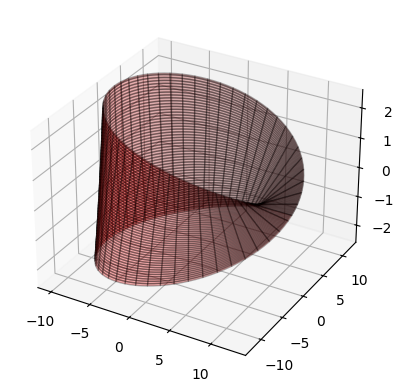

Surface Area = 157.42955696620504
Edge Length = 63.32576918380331


In [3]:
#Importing numpy for numerical computations and matplotlib for plotting 3D graphs
import numpy as np
import matplotlib.pyplot as plt

#Defing the MobiusStrip Class
class MobiusStrip:
  #Constructor
  def __init__(self,R,w,n):
    self.R = R
    self.w = w
    self.resolution = n
    self.generate_mesh()

  #Generating the mesh with given parametric equations
  def generate_mesh(self):
    u = np.linspace(0,2*np.pi,self.resolution)
    v = np.linspace(-self.w/2,self.w/2,self.resolution)
    u,v = np.meshgrid(u,v)
    self.x = (self.R + v*np.cos(u/2))*np.cos(u)
    self.y = (self.R + v*np.cos(u/2))*np.sin(u)
    self.z = (v*np.sin(u/2))

  #Plotting the MobiusStrip
  def plot(self):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(self.x,self.y,self.z,color='red',alpha = 0.3, edgecolor = 'k')
    plt.show()

  #Approximation of surface area
  def compute_surface_area(self):
    area = 0
    for i in range(self.resolution-1):
      for j in range(self.resolution -1):
        p1 = np.array([self.x[i,j], self.y[i,j], self.z[i,j]])
        p2 = np.array([self.x[i+1,j], self.y[i+1,j], self.z[i+1,j]])
        p3 = np.array([self.x[i,j+1], self.y[i,j+1], self.z[i,j+1]])
        v1 = p2-p1
        v2 = p3-p1
        area += np.linalg.norm(np.cross(v1,v2))/2
    return area

  #Computing Edge Length
  def compute_edge_length(self):
    u = np.linspace(0,2*np.pi, self.resolution)
    v = np.full_like(u, self.w/2)
    x = (self.R + v*np.cos(u/2))*np.cos(u)
    y = (self.R + v*np.cos(u/2))*np.sin(u)
    z = (v*np.sin(u/2))
    length = sum(np.linalg.norm([x[i+1]-x[i], y[i+1]-y[i],z[i+1]-z[i]]) for i in range(len(u)-1))
    return length

mobius = MobiusStrip(R=10, w=5,n=100)
mobius.plot()
print(f'Surface Area = {mobius.compute_surface_area()}')
print(f'Edge Length = {mobius.compute_edge_length()}')

#*How you structured the code*

---




*   Created the class called "MobiusStrip" which has the "__init__" method to accept the radius "R" , width "w" and resolution "n".
*   "generate_mesh()" method generates the 3D mesh points from the given parametric equations.
*   "compute_surface_area()" method approximates the surface area of the mobius strip by breaking the mesh into triangular pieces.
* "compute_edge_length()" method calculates the length of strip's edge using the distance between consecutive points.
* Finally plotting the 3D graph of the mobius strip using the matplotlib.





# *How you approximated the surface area*


---


1.   The Mobius strip is divided into grid (mesh points).
2.   Program picks 3 neighbouring points from each small quadrilateral from the grid to form a triangle. #(p1,p2,p3)
3.   For each triangle program computes:
  *   Two side vectors(v1 & v2) using the difference between two points.
      (v1 = p2-p1 & v2 = p3-p1)
  *   Cross product of vectors and the area of parallelogram formed the vectors.
  *   The area of the triangle is half of the area of parallelogram. ( area of triagle = 1/2∥ v1 × v2∥)
4.  By summing up all the area of the triagle gives the approximate value of the surface area of mobius strip.





# *Any challenges you faced*


---




* **Surface area Approximation :** Ensuring the resolution to get smooth surface and accurate area without slowing down the calculation/computation. And breaking down the grid into triangles and their area calculations.
*  **Visualization:** Choosing the transparency , color and edge rendering options in 3D plot.

